In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

In [48]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('trainingset_v1d1_metadata.csv')

Saving trainingset_v1d1_metadata.csv to trainingset_v1d1_metadata (3).csv


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_time       7966 non-null   float64
 1   ifo              7966 non-null   object 
 2   peak_time        7966 non-null   int64  
 3   peak_time_ns     7966 non-null   int64  
 4   start_time       7966 non-null   int64  
 5   start_time_ns    7966 non-null   int64  
 6   duration         7966 non-null   float64
 7   search           7966 non-null   object 
 8   process_id       7966 non-null   int64  
 9   event_id         7966 non-null   int64  
 10  peak_frequency   7966 non-null   float64
 11  central_freq     7966 non-null   float64
 12  bandwidth        7966 non-null   float64
 13  channel          7966 non-null   object 
 14  amplitude        7966 non-null   float64
 15  snr              7966 non-null   float64
 16  confidence       7966 non-null   int64  
 17  chisq         

## 데이터셋 정보

0. event_time : 이벤트 발생 시간 <br>
1. ifo : 감지기 이름 <br>
2. peak_time : 피크 시간(초 단위) <br>
3. peak_time_ns : 피크 시간(나노초 단위) <br>
4. start_time : 이벤트 시작 시간(초 단위) <br>
5. start_time_ns : 이벤트 시작 시간 (나노초 단위) <br>
6. duration : 이벤트 지속 시간 <br>
7. search : 탐색 알고리즘 이름 <br>
8. process_id : 프로세스 ID <br>
9. event_id : 이벤트 ID <br>
10. peak_frequency : 피크 주파수 <br>
11. central_freq : 중심 주파수 <br>
12. bandwidth : 대역폭 <br>
13. channel : 채널
14. amplitude : 진폭 <br>
15. snr : 신호 대 잡음 비율 <br>
16. confidence : 신뢰도 <br>
17. chisq : 카이제곱 통계량 <br>
18. chisq_dof : 자유도 <br>
19. param_one_name : 첫 번째 파라미터 이름 <br>
20. param_one_value : 첫 번째 파라미터 값 <br>
21. gravityspy_id : GravitySpy ID <br>
22. label : 라벨 <br>
23. sample_type : 샘플 타입 <br>
24. url1 : 이미지 url1 <br>
25. url2 : 이미지 url2 <br>
26. url3 : 이미지 url3 <br>
27. url4 : 이미지 url4

## 데이터 분석

In [50]:
# 필요한 열만 선택
selected_columns = ['event_time', 'duration', 'amplitude', 'snr', 'confidence','label']
df = df[selected_columns]

In [51]:
#label 칼럼 숫자 변환
df['label'] = df['label'].astype('category').cat.codes

<ipython-input-51-c43f293b48a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype('category').cat.codes


In [52]:
# 상관관계 분석을 위해 숫자형 열만 선택
numeric_df = df.select_dtypes(include=[np.number])

In [53]:
# 상관관계 분석
corr = numeric_df.corr().round(2)

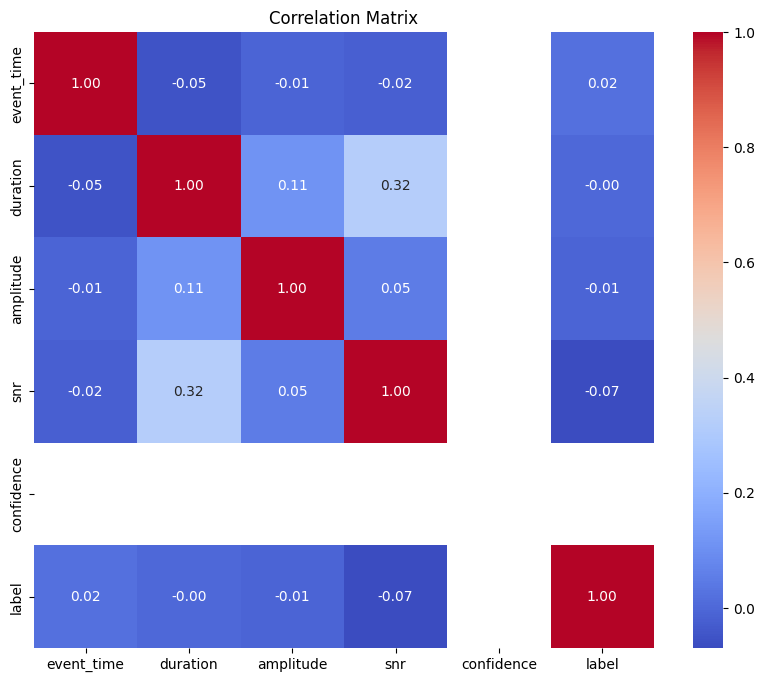

In [54]:
# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 모델 생성

In [55]:
# 특성과 타겟 설정
X = df.drop('label', axis=1)
Y = df['label']

In [56]:
# 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [57]:
# 로지스틱 회귀 모델 학습
LRmodel = LogisticRegression(max_iter=1000)
LRmodel.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [58]:
# 예측
predict_results = LRmodel.predict(X_test)

In [59]:
# 평가
accuracy = accuracy_score(Y_test, predict_results)
print(f'Accuracy: {accuracy}')

Accuracy: 0.23092369477911648


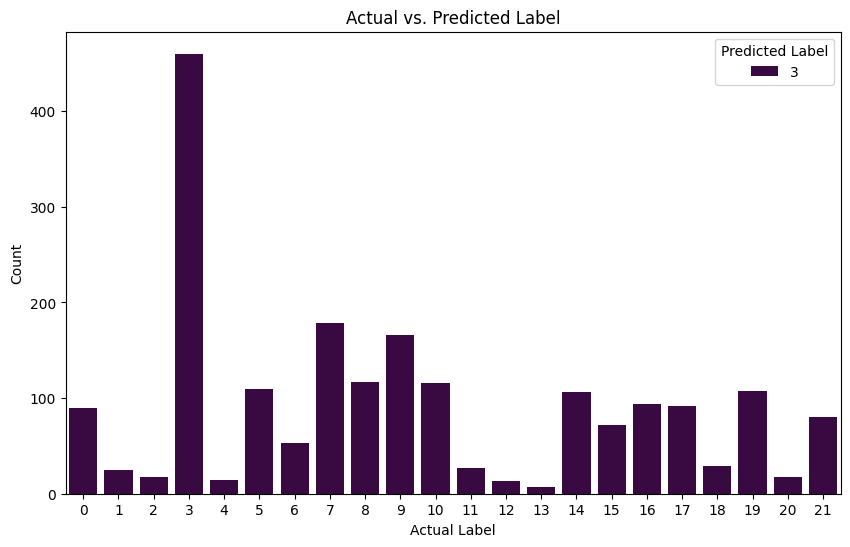

In [67]:
# 예측 결과 시각화 - 카운트 플롯
plt.figure(figsize=(10, 6))
sns.countplot(x=Y_test, hue=predict_results, palette='PRGn')
plt.xlabel('Actual Label')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Label')
plt.legend(title='Predicted Label')
plt.show()

## 혼동 행렬 시각화


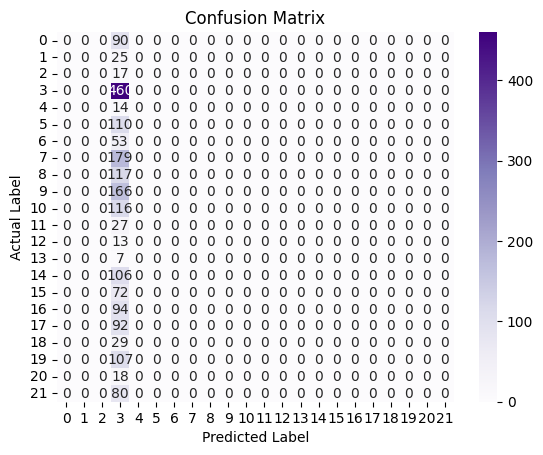

In [68]:
conf_matrix = confusion_matrix(Y_test, predict_results)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels=LRmodel.classes_, yticklabels=LRmodel.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [63]:
new_data = np.array([[1, 1, 0.5, 2,0.8]])
predicted_label = LRmodel.predict(new_data)
print(f'Predicted Label for new data: {predicted_label}')

Predicted Label for new data: [3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
